In [29]:
import os, sys
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
from tensorflow import keras

In [31]:
import matplotlib.pylab as plt

In [32]:
(train_input,train_target), (test_input,test_target) =keras.datasets.fashion_mnist.load_data()

In [33]:
train_input.shape

(60000, 28, 28)

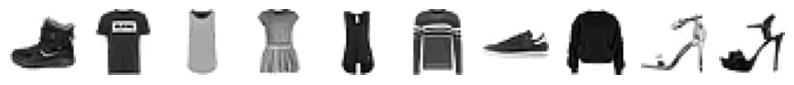

In [34]:
fig, axs = plt.subplots(1,10,figsize = (10,10))
for i in range(10):
  axs[i].imshow(train_input[i],cmap='gray_r')
  axs[i].axis('off')

plt.show()

In [35]:
set(train_target)
#티셔츠,바지,스웨터,드레스,코트,샌달,셔츠,스니커즈,가방,앵글부츠

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [36]:
train_input.shape

(60000, 28, 28)

In [37]:
train_scaled = train_input /255

In [38]:
train_scaled.shape

(60000, 28, 28)

In [39]:
train_scaled = train_scaled.reshape(-1, 28*28)

In [40]:
train_scaled.shape

(60000, 784)

In [41]:
from sklearn.model_selection import cross_validate

In [42]:
from sklearn.linear_model import SGDClassifier

In [43]:
sc = SGDClassifier(loss = 'log', max_iter=5, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)

In [44]:
scores['test_score']

array([0.83075   , 0.82025   , 0.82041667, 0.808     , 0.81858333])

In [45]:
np.mean(scores['test_score'])

0.8196000000000001

In [46]:
import tensorflow as tf
from tensorflow import keras

In [47]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42)

In [48]:
train_scaled.shape

(48000, 784)

In [49]:
val_scaled.shape

(12000, 784)

In [51]:
#뉴런의 개수가 10개 act func = softmax 입력 데이터 크기 = 784, dense 은닉층, 마지막 은닉층만 class 갯수 맞춰 줌 
#softmax 결과 값을 총 합이 1인 비율로 재구성 
#뉴런의 갯수가 왜 10개일까? target의 결과가 10개이기 때문
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [52]:
model = keras.Sequential(dense)

In [53]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy') #metrics = accuracy 모델 정확도 

In [54]:
model.fit(train_scaled, train_target, epochs=5)
#1500 = 연산 갯수 

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6083 - accuracy: 0.7952
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4746 - accuracy: 0.8400
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4501 - accuracy: 0.8479
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4379 - accuracy: 0.8521
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4290 - accuracy: 0.8547


In [60]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden') #뉴런 갯수 100개 sigmoid, 784
dense2 = keras.layers.Dense(10, activation='softmax', name='output') #뉴런 갯수 10개 softmax
model = keras.Sequential([dense1, dense2])

In [59]:
model.summary()
#w = 가중치, d= dense
#w1 = 784(input)*100(d1) =78400, w2 = 100(d1) * 10(d2) = 1000
#param = danse param + dense param = 78400 + 100
#param = danse param + dense param = 1000 + 10

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [68]:
model.fit(train_scaled, train_target, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2910 - accuracy: 0.8928
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2826 - accuracy: 0.8966
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2748 - accuracy: 0.8990
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2673 - accuracy: 0.9016
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2608 - accuracy: 0.9052
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2540 - accuracy: 0.9073
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2485 - accuracy: 0.9095
Epoch 8/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2426 - accuracy: 0.9112
Epoch 9/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2375 - accuracy: 0.9132
Epoch 10/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.232

In [66]:
model.evaluate(val_scaled, val_target) #epochs=5

375/375 [==============================] - 1s 2ms/step - loss: 0.3461 - accuracy: 0.8738


[0.3461452126502991, 0.8738333582878113]

In [69]:
model.evaluate(val_scaled, val_target) #epochs=10

375/375 [==============================] - 1s 3ms/step - loss: 0.3194 - accuracy: 0.8877


[0.3194429874420166, 0.887666642665863]

In [70]:
model = keras.Sequential()

In [72]:
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,))) #즉각적인 업데이트
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
#optimaizer 과대적합을 방지하기위해 실행을 적정 선까지 제한하는 함수
#미세하게 움직일 것이냐, 점점 커지면서 움직일 것이냐 loss를 찾을 접점을 빠르게 찾을지 섬세하게 찾을지 
#adam 두 종류를 합쳐 놓은 옵티마이져

In [73]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5263 - accuracy: 0.8164
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3942 - accuracy: 0.8581
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3550 - accuracy: 0.8709
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3272 - accuracy: 0.8800
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3061 - accuracy: 0.8868


In [74]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3528 - accuracy: 0.8740


[0.35284024477005005, 0.8740000128746033]

In [77]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [81]:
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [82]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [83]:
history.history['loss']

[0.533669114112854,
 0.39670437574386597,
 0.35640618205070496,
 0.3314744830131531,
 0.3165886700153351]

In [84]:
history.history['accuracy']

[0.8119791746139526,
 0.8565208315849304,
 0.8723750114440918,
 0.8813333511352539,
 0.8863124847412109]

In [85]:
history = model.fit(train_scaled, train_target, epochs=5, verbose=0, validation_data=(val_scaled, val_target))

In [87]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

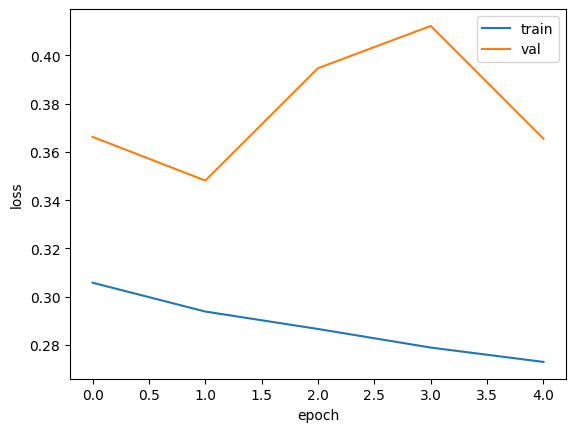

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

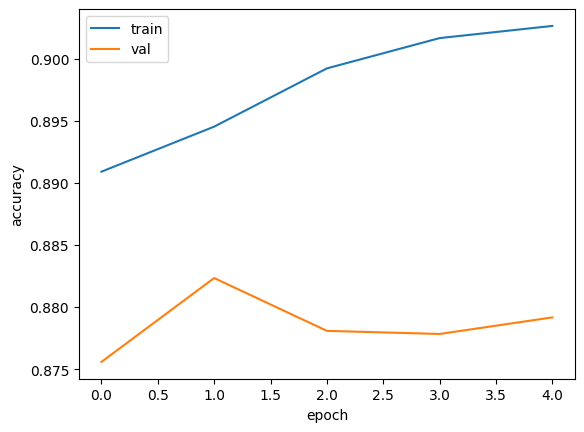

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [92]:
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

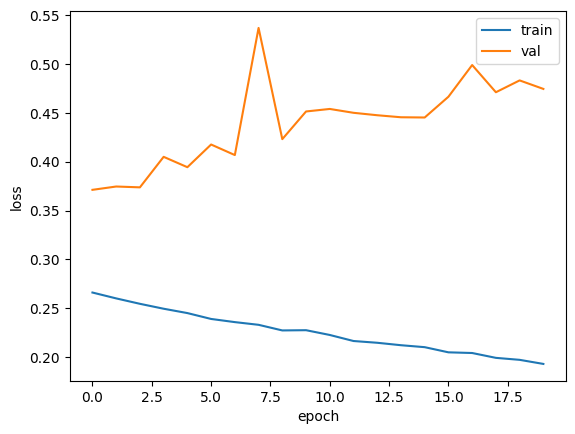

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [94]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dropout(0.3)) #30% 드랍아웃
model.add(keras.layers.Dense(10, activation='softmax'))

In [95]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [96]:
#모델 가중치만 저장
model.save_weights('model-weights.h5')

In [97]:
#모델 구조 그리고 가중치 모두 저장
model.save('model.h5')

In [100]:
!ls

drive  model.h5  model-weights.h5  sample_data


In [101]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dropout(0.3)) #30% 드랍아웃
model.add(keras.layers.Dense(10, activation='softmax'))

In [104]:
model.load_weights('model-weights.h5')

In [105]:
model = keras.models.load_model('model.h5')

In [106]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
